# EDA Online Retail

## 1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu

In [1]:
import pandas as pd

# Đọc dữ liệu
retail_data = pd.read_excel("Online Retail.xlsx")

# Lọc các cột chính cần thiết
retail_data = retail_data[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']]

# Tạo cột doanh thu
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']

# Loại bỏ giá trị âm hoặc thiếu
retail_data = retail_data[(retail_data['Quantity'] > 0) & (retail_data['UnitPrice'] > 0)]
retail_data = retail_data.dropna(subset=['CustomerID', 'Country'])

# Tạo thêm cột tháng để phân tích xu hướng theo thời gian
retail_data['Month'] = pd.to_datetime(retail_data['InvoiceDate']).dt.month

retail_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


## 2. Trức quan hóa dữ liệu với thư viện Matplotlib

### Case 1: Basic

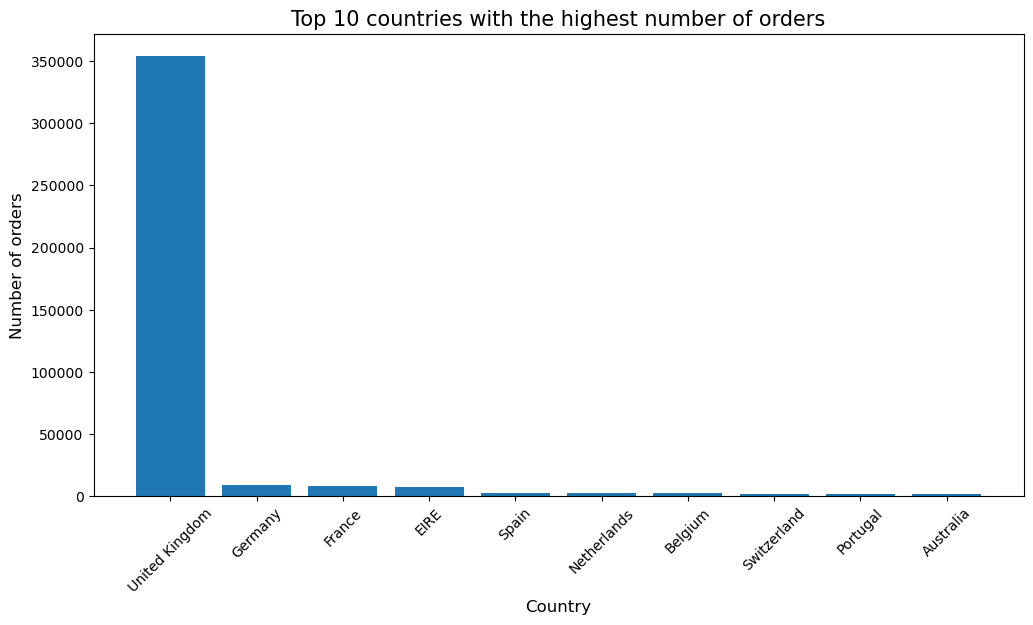

In [2]:
import matplotlib.pyplot as plt

country_orders = retail_data['Country'].value_counts().head(10)

plt.figure(figsize=(12,6))
plt.bar(country_orders.index, country_orders.values)
plt.title('Top 10 countries with the highest number of orders', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of orders', fontsize=12)
plt.xticks(rotation=45)
plt.show()


##### United Kingdom (Vương quốc Anh) vượt trội hoàn toàn so với tất cả các quốc gia khác, với số lượng đơn hàng cao gấp hàng chục lần so với nước đứng thứ hai.  
##### Các quốc gia khác như Germany, France, EIRE (Ireland), Spain có số lượng đơn hàng tương đối nhỏ, gần như không đáng kể nếu so với Anh.  
##### Một số quốc gia nhỏ hơn (Netherlands, Belgium, Switzerland, Portugal, Australia) có số lượng đơn hàng khá tương đồng và thấp.  
##### Kết luận:  
##### United Kingdom là thị trường chính, chiếm phần lớn doanh thu và đơn hàng trong bộ dữ liệu.  
##### Các nước khác chỉ chiếm tỷ lệ rất nhỏ, chứng tỏ công ty tập trung chủ yếu vào khách hàng nội địa.  
##### Biểu đồ này giúp nhận diện thị trường trọng điểm và gợi ý cho doanh nghiệp nếu muốn mở rộng quốc tế thì nên đầu tư chiến lược marketing riêng cho các quốc gia khác.


### Case 2: Advanced 1

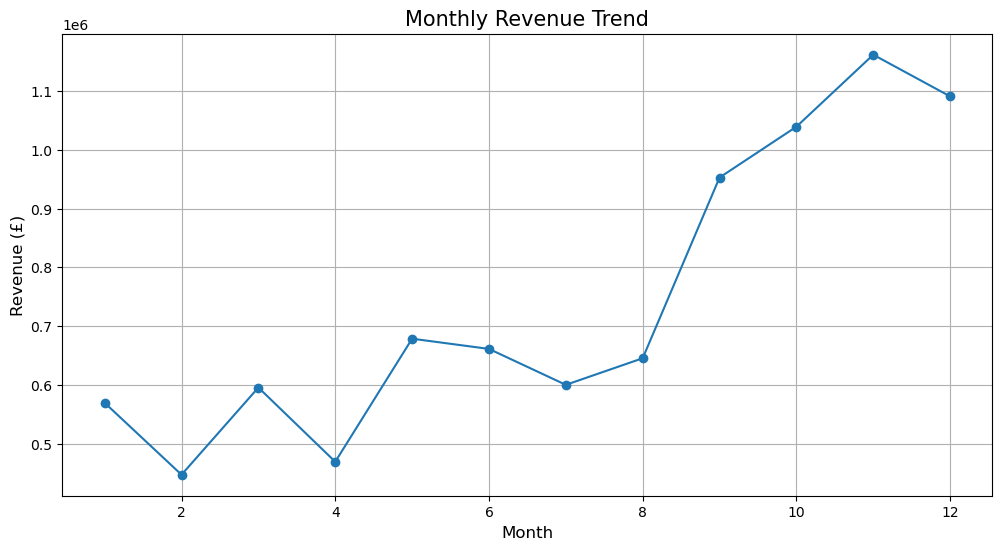

In [3]:
monthly_revenue = retail_data.groupby('Month')['TotalPrice'].sum().sort_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trend', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.grid(True)
plt.show()


##### Mô tả biểu đồ:  
##### Biểu đồ đường thể hiện tổng doanh thu (Revenue) của cửa hàng theo từng tháng trong năm.  
##### Trục X là Month (tháng), trục Y là Revenue (£).  
##### Phân tích:  
##### Doanh thu biến động qua các tháng trong năm.  
##### Từ tháng 1–8, doanh thu dao động ở mức trung bình, có lúc giảm nhẹ (đặc biệt tháng 2 và 4).  
##### Từ tháng 9 trở đi, doanh thu tăng mạnh rõ rệt, đặc biệt vào các tháng 10, 11 và 12.  
##### Tháng 11 đạt doanh thu cao nhất, vượt xa các tháng còn lại.  
##### Nhận xét:  
##### Sự gia tăng doanh thu cuối năm có thể đến từ mùa mua sắm Giáng sinh, Black Friday và các chương trình giảm giá cuối năm.  
##### Doanh nghiệp có thể tận dụng xu hướng này để:  
##### Tăng cường quảng cáo, khuyến mãi.  
##### Chuẩn bị hàng tồn kho và logistics tốt hơn vào quý IV.


### Case 3: Advanced 2

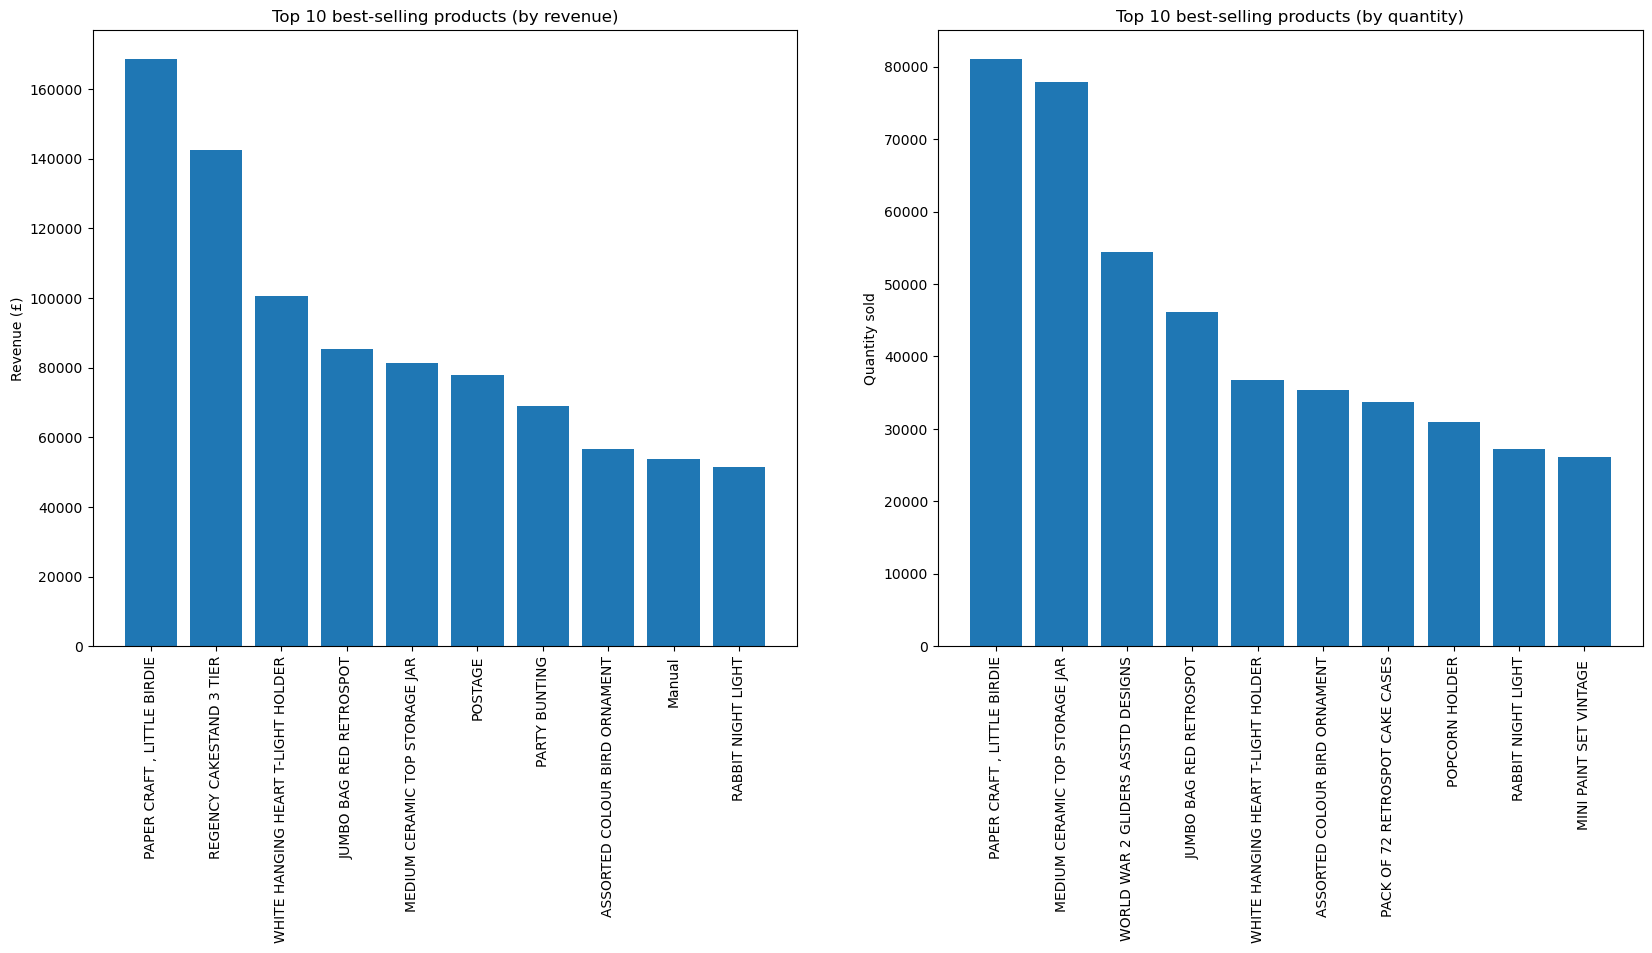

In [4]:
top_products = retail_data.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

fig, ax = plt.subplots(1,2, figsize=(20,8))

# Tổng doanh thu
ax[0].bar(top_products.index, top_products.values)
ax[0].set_title('Top 10 best-selling products (by revenue)')
ax[0].tick_params(axis='x', rotation=90)
ax[0].set_ylabel('Revenue (£)')

# Số lượng bán
top_quantity = retail_data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
ax[1].bar(top_quantity.index, top_quantity.values)
ax[1].set_title('Top 10 best-selling products (by quantity)')
ax[1].tick_params(axis='x', rotation=90)
ax[1].set_ylabel('Quantity sold')

plt.show()


##### Mô tả biểu đồ:  
##### Biểu đồ bên trái: 10 sản phẩm có doanh thu cao nhất (Revenue).  
##### Biểu đồ bên phải: 10 sản phẩm có số lượng bán ra nhiều nhất (Quantity).  
##### Phân tích:  
##### Theo doanh thu (Revenue):  
##### Các sản phẩm như “PAPER CRAFT, LITTLE BIRDIE”, “REGENCY CAKESTAND 3 TIER”, “WHITE HANGING HEART T-LIGHT HOLDER” mang lại doanh thu cao nhất.  
##### Đây là nhóm sản phẩm có giá trị cao hoặc bán chạy trong dịp đặc biệt.  
##### Theo số lượng (Quantity):  
##### Sản phẩm “PAPER CRAFT, LITTLE BIRDIE” cũng đứng đầu, cho thấy vừa bán nhiều vừa mang lại doanh thu lớn → đây là sản phẩm chủ lực.  
##### Một số sản phẩm khác như “MEDIUM CERAMIC TOP STORAGE JAR”, “WORLD WAR 2 GLIDERS ASSTD DESIGNS” có lượng bán lớn nhưng doanh thu chưa cao, có thể do giá đơn vị thấp.  
##### Nhận xét tổng hợp:  
##### Các sản phẩm liên quan đến trang trí, quà tặng, thủ công chiếm ưu thế → phù hợp với đặc thù ngành bán lẻ quà lưu niệm.  
##### “PAPER CRAFT, LITTLE BIRDIE” là mặt hàng đáng chú ý nhất: doanh thu cao, số lượng bán lớn, phù hợp để tập trung marketing hoặc nhập thêm hàng.  
##### Cửa hàng có thể xem xét điều chỉnh giá hoặc khuyến mãi gói combo cho các sản phẩm bán nhiều nhưng doanh thu thấp để tối ưu lợi nhuận.


## 3. Trực quan hóa dữ liệu với thư viện Seaborn

### Case 1:Basic


C:\Users\HP\AppData\Local\Temp\ipykernel_7460\774636470.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Country', y='TotalPrice', palette='pastel')


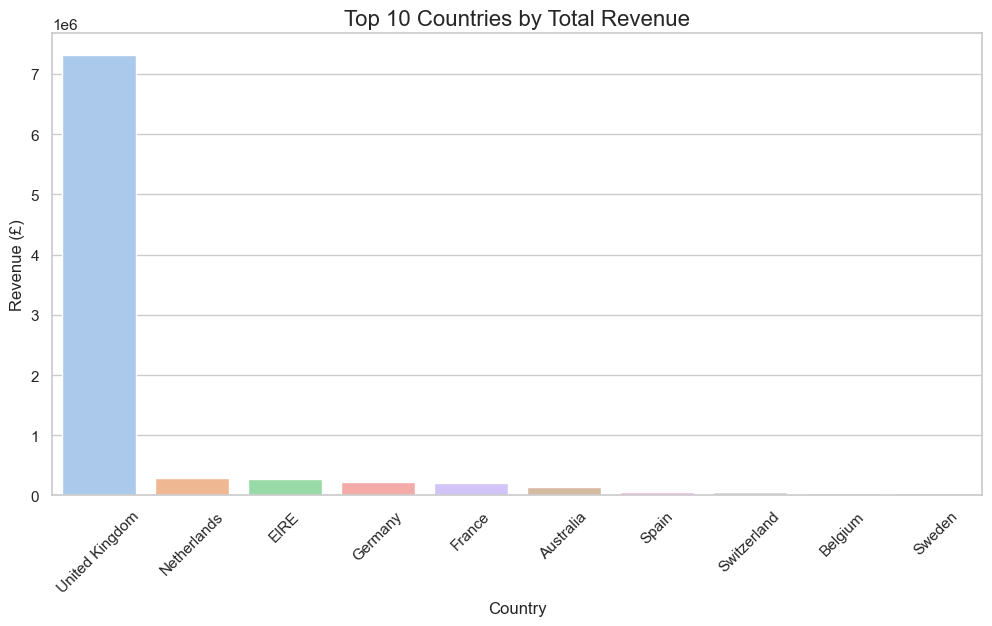

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tổng doanh thu theo quốc gia
top_countries = retail_data.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x='Country', y='TotalPrice', palette='pastel')
plt.title('Top 10 Countries by Total Revenue', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=45)
plt.show()


##### Mô tả:  
##### Biểu đồ barplot thể hiện tổng doanh thu (TotalPrice) theo từng quốc gia (Top 10 nước).  
##### Dùng sns.barplot() để trực quan hóa đẹp và rõ ràng hơn so với Matplotlib.  
##### Phân tích:  
##### United Kingdom (Anh) chiếm doanh thu áp đảo — cao gấp nhiều lần so với các quốc gia khác.  
##### Các nước như Germany, France, EIRE (Ireland) và Spain xếp sau với mức doanh thu khá thấp.  
##### Các quốc gia còn lại có doanh thu chỉ chiếm phần nhỏ.  
##### Nhận xét:  
##### Thị trường Anh Quốc là thị trường chủ lực, mang lại gần như toàn bộ doanh thu.  
##### Cần xem xét lý do các quốc gia khác đóng góp ít doanh thu — có thể do chi phí vận chuyển cao hoặc hoạt động tiếp thị chưa được đẩy mạnh.


### Case 2: advanced 1

C:\Users\HP\AppData\Local\Temp\ipykernel_7460\3433977631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_order, y='Country', x='TotalPrice', palette='crest')


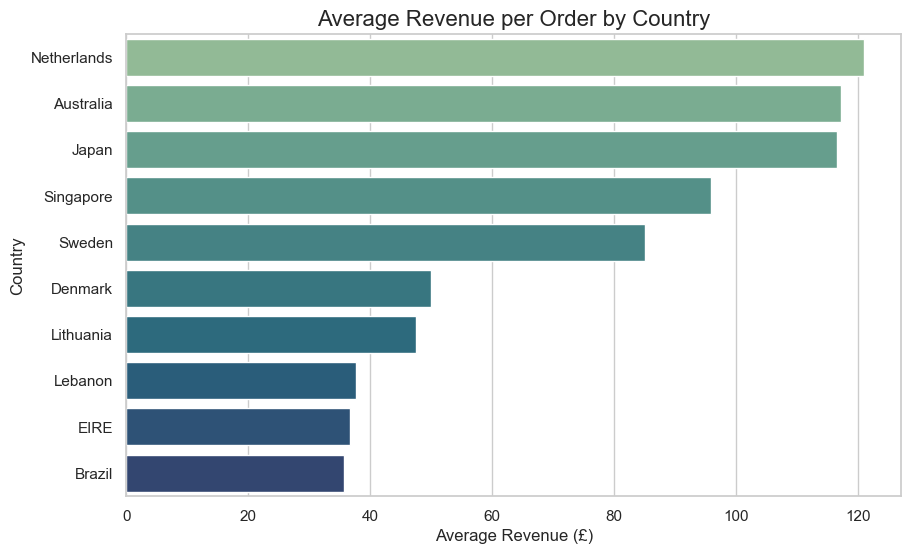

In [21]:
# Tính doanh thu trung bình trên mỗi đơn hàng
avg_order = retail_data.groupby('Country')['TotalPrice'].mean().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=avg_order, y='Country', x='TotalPrice', palette='crest')
plt.title('Average Revenue per Order by Country', fontsize=16)
plt.xlabel('Average Revenue (£)')
plt.ylabel('Country')
plt.show()



##### Mô tả biểu đồ:  
##### Biểu đồ cột ngang thể hiện doanh thu trung bình trên mỗi đơn hàng của các quốc gia khác nhau.  
##### Phân tích chi tiết:  
##### Các quốc gia như Netherlands, Australia, Japan có mức chi tiêu trung bình/đơn hàng cao nhất, xấp xỉ £110–120.  
##### Nhóm quốc gia trung bình gồm Singapore, Sweden, Norway có giá trị khoảng £90–100.  
##### Các quốc gia như Brazil, Lebanon, EIRE có doanh thu thấp nhất, chỉ khoảng £35–45 mỗi đơn hàng.  
##### Nhận xét:  
##### Điều này phản ánh sức mua và hành vi tiêu dùng khác nhau giữa các thị trường.  
##### Các nước phát triển thường mua các mặt hàng có giá trị cao hoặc mua số lượng lớn trong một lần đặt hàng, trong khi các nước đang phát triển có xu hướng mua lẻ hoặc hàng giá rẻ hơn.


### Case 3: advanced 2

C:\Users\HP\AppData\Local\Temp\ipykernel_7460\3554854441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_revenue, x='Month', y='TotalPrice', palette='viridis', ax=ax[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_7460\3554854441.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_quantity, x='Month', y='Quantity', palette='mako', ax=ax[1])


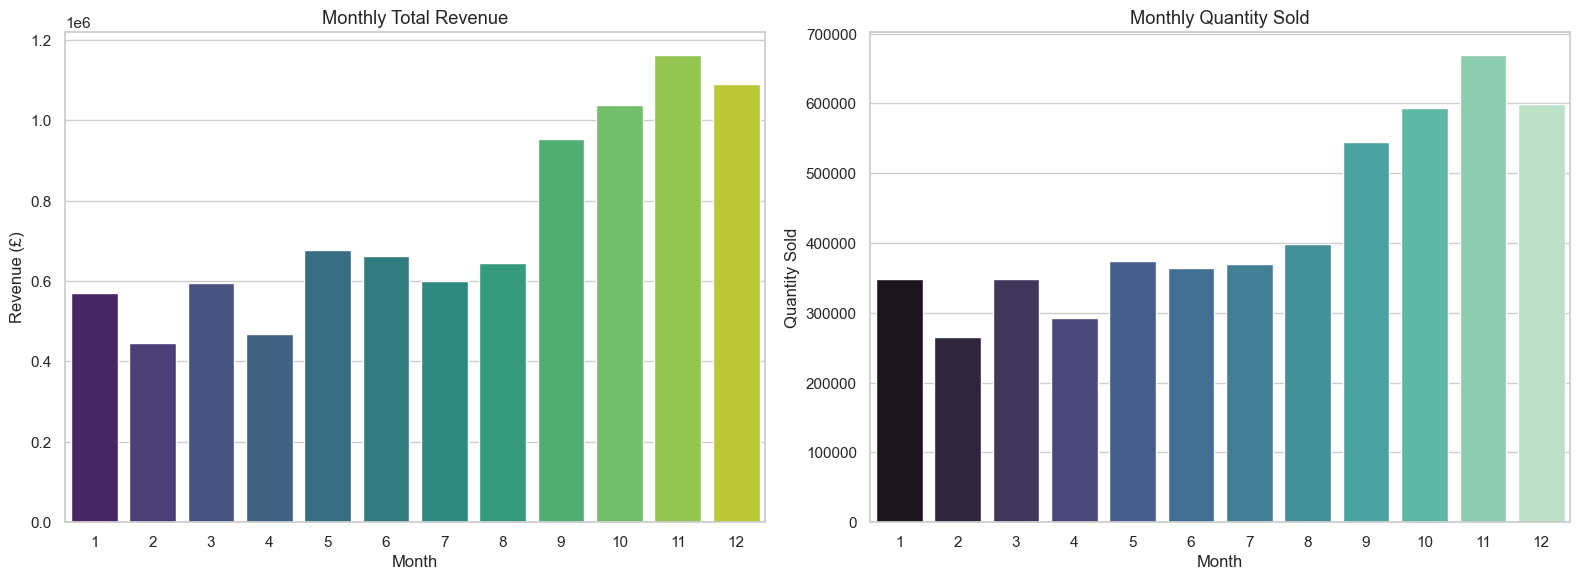

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.set(style='whitegrid', font_scale=1.1)

# Biểu đồ 1: Tổng doanh thu theo tháng
monthly_revenue = retail_data.groupby('Month')['TotalPrice'].sum().reset_index()
sns.barplot(data=monthly_revenue, x='Month', y='TotalPrice', palette='viridis', ax=ax[0])
ax[0].set_title('Monthly Total Revenue')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Revenue (£)')

# Biểu đồ 2: Tổng số lượng bán ra theo tháng
monthly_quantity = retail_data.groupby('Month')['Quantity'].sum().reset_index()
sns.barplot(data=monthly_quantity, x='Month', y='Quantity', palette='mako', ax=ax[1])
ax[1].set_title('Monthly Quantity Sold')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Quantity Sold')

plt.tight_layout()
plt.show()


##### Mô tả biểu đồ bên trái (Monthly Total Revenue)  
##### Biểu đồ cột thể hiện tổng doanh thu (£) theo từng tháng trong năm.  
##### Phân tích chi tiết:  
##### Doanh thu tăng dần từ tháng 5 trở đi, rõ rệt nhất là từ tháng 9 đến tháng 12.  
##### Tháng 11 và 12 đạt doanh thu cao nhất, khoảng 1.1–1.2 triệu £, gấp đôi so với trung bình đầu năm.  
##### Các tháng 1–4 doanh thu tương đối thấp (khoảng 0.45–0.6 triệu £).  
##### Nhận xét:  
##### Mức tăng mạnh vào cuối năm cho thấy tác động của mùa lễ hội, Black Friday và Giáng sinh, khi nhu cầu mua sắm tăng cao.  
##### Đây là giai đoạn “vàng” của doanh nghiệp bán lẻ, nên cần đẩy mạnh chiến dịch marketing, tăng hàng tồn kho và khuyến mãi.  
##### Kết luận:  
##### Quý IV (tháng 10–12) là thời kỳ doanh thu đỉnh điểm, chiếm tỷ trọng cao nhất trong năm.  

##### Mô tả biểu đồ bên phải (Monthly Quantity Sold)  
##### Biểu đồ cột thể hiện tổng số lượng sản phẩm được bán ra qua từng tháng.  
##### Phân tích chi tiết:  
##### Từ tháng 1 đến tháng 8, số lượng bán ra tương đối ổn định.  
##### Tăng mạnh từ tháng 9 và đạt đỉnh vào tháng 11, trùng với giai đoạn doanh thu tăng cao nhất.  
##### Tháng 12 số lượng bán ra giảm nhẹ, nhưng doanh thu vẫn cao → cho thấy nhiều mặt hàng giá trị cao được bán.  
##### Nhận xét:  
##### Có mối tương quan chặt chẽ giữa doanh thu và số lượng bán ra.  
##### Giai đoạn cuối năm (đặc biệt tháng 11) là thời điểm hoạt động bán hàng sôi động nhất.  
##### Kết luận:  
##### Tháng 11 là tháng bán hàng hiệu quả nhất, cả về số lượng lẫn doanh thu.
